In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ape = pd.read_csv("app_events.csv")

In [3]:
ape['installed'] = ape.groupby(['event_id'])['is_installed'].transform('sum')

In [4]:
ape.head()

,event_id,app_id,is_installed,is_active,installed
0,2,5927333115845830913,1,1,19
1,2,-5720078949152207372,1,0,19
2,2,-1633887856876571208,1,0,19
3,2,-653184325010919369,1,1,19
4,2,8693964245073640147,1,1,19


In [5]:
ape['active'] = ape.groupby(['event_id'])['is_active'].transform('sum')

In [6]:
ape.head()

,event_id,app_id,is_installed,is_active,installed,active
0,2,5927333115845830913,1,1,19,6
1,2,-5720078949152207372,1,0,19,6
2,2,-1633887856876571208,1,0,19,6
3,2,-653184325010919369,1,1,19,6
4,2,8693964245073640147,1,1,19,6


In [7]:
ape.drop(['is_installed', 'is_active'], axis=1, inplace=True)

In [8]:
ape.head()

,event_id,app_id,installed,active
0,2,5927333115845830913,19,6
1,2,-5720078949152207372,19,6
2,2,-1633887856876571208,19,6
3,2,-653184325010919369,19,6
4,2,8693964245073640147,19,6


# read app labels to get app categories here 

In [9]:
# Reading app labels
apl = pd.read_csv('app_labels.csv')
lct = pd.read_csv('label_categories.csv')

In [12]:
act = pd.merge(apl, lct, how='left', on='label_id')

In [13]:
act.head()

,app_id,label_id,category
0,7324884708820027918,251,Finance
1,-4494216993218550286,251,Finance
2,6058196446775239644,406,unknown
3,6058196446775239644,407,DS_P2P net loan
4,8694625920731541625,406,unknown


In [14]:
ape.drop_duplicates('event_id', keep='first', inplace=True)

In [16]:
ape = pd.merge(ape, act, how='left', on='app_id')

In [17]:
ape.head()

,event_id,app_id,installed,active,label_id,category
0,2,5927333115845830913,19,6,549,Property Industry 1.0
1,2,5927333115845830913,19,6,710,Relatives 1
2,2,5927333115845830913,19,6,704,Property Industry 2.0
3,2,5927333115845830913,19,6,548,Industry tag
4,2,5927333115845830913,19,6,172,IM


In [18]:
ape.drop(['app_id'], axis=1, inplace=True)

In [19]:
ape.head()

,event_id,installed,active,label_id,category
0,2,19,6,549,Property Industry 1.0
1,2,19,6,710,Relatives 1
2,2,19,6,704,Property Industry 2.0
3,2,19,6,548,Industry tag
4,2,19,6,172,IM


In [20]:
events = pd.read_csv("events.csv", dtype={'device_id': np.str})

In [21]:
# Count of number of times an event is happening for a device
events['counts'] = events.groupby(['device_id'])['event_id'].transform('count')

In [22]:
events.head()

,event_id,device_id,timestamp,longitude,latitude,counts
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,256
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,73
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70,248
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28,47
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66,525


In [23]:
# The idea here is to count the number of installed apps using the data
# from app_events.csv above. Also to count the number of active apps.
events = pd.merge(events, ape, how='left', on='event_id', left_index=True)

In [24]:
events.head()

,event_id,device_id,timestamp,longitude,latitude,counts,installed,active,label_id,category
8463466,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,256,NaN,NaN,NaN,NaN
0,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,73,19.0,6.0,549.0,Property Industry 1.0
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,73,19.0,6.0,710.0,Relatives 1
2,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,73,19.0,6.0,704.0,Property Industry 2.0
3,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,73,19.0,6.0,548.0,Industry tag


In [26]:
events_small = events[['device_id', 'counts', 'installed', 'active', 'label_id']].drop_duplicates('device_id', keep='first')

In [27]:
events_small.head()

,device_id,counts,installed,active,label_id
8463466,29182687948017175,256,NaN,NaN,NaN
0,-6401643145415154744,73,19.0,6.0,549.0
8463466,-4833982096941402721,248,NaN,NaN,NaN
8463466,-6815121365017318426,47,NaN,NaN,NaN
8463466,-5373797595892518570,525,NaN,NaN,NaN


In [28]:
pbd = pd.read_csv("phone_brand_device_model.csv", dtype={'device_id': np.str})

In [29]:
pbd.drop_duplicates('device_id', keep='first', inplace=True)

In [30]:
def map_column(table, f):
    labels = sorted(table[f].unique())
    mappings = dict()
    for i in range(len(labels)):
        mappings[labels[i]] = i
    table = table.replace({f: mappings})
    return table

pbd = map_column(pbd, 'phone_brand')

In [31]:
pbd.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,51,红米
1,1277779817574759137,51,MI 2
2,5137427614288105724,15,Galaxy S4
3,3669464369358936369,9,时尚手机
4,-5019277647504317457,15,Galaxy Note 2


In [32]:
pbd = map_column(pbd, 'device_model')

In [33]:
pbd.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,51,1517
1,1277779817574759137,51,749
2,5137427614288105724,15,560
3,3669464369358936369,9,1503
4,-5019277647504317457,15,536


In [34]:
#Train
train = pd.read_csv("gender_age_train.csv", dtype={'device_id': np.str})

In [35]:
train = map_column(train, 'group')

In [36]:
train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,10
1,-2897161552818060146,M,35,10
2,-8260683887967679142,M,35,10
3,-4938849341048082022,M,30,9
4,245133531816851882,M,30,9


In [37]:
train = train.drop(['age'], axis=1)
train = train.drop(['gender'], axis=1)

In [38]:
train = pd.merge(train, pbd, how='left', on='device_id', left_index=True)

In [39]:
train.head()

,device_id,group,phone_brand,device_model
56800,-8076087639492063270,10,51,749
41294,-2897161552818060146,10,51,749
9993,-8260683887967679142,10,51,749
179893,-4938849341048082022,9,51,1524
102570,245133531816851882,9,51,753


In [40]:
train = pd.merge(train, events_small, how='left', on='device_id', left_index=True)

In [41]:
train.head()

,device_id,group,phone_brand,device_model,counts,installed,active,label_id
8460527,-8076087639492063270,10,51,749,NaN,NaN,NaN,NaN
8460527,-2897161552818060146,10,51,749,NaN,NaN,NaN,NaN
6455195,-8260683887967679142,10,51,749,1.0,53.0,6.0,713.0
8460527,-4938849341048082022,9,51,1524,NaN,NaN,NaN,NaN
8460527,245133531816851882,9,51,753,NaN,NaN,NaN,NaN


In [42]:
# Impute the N/A with -1
train.fillna(-1, inplace=True)

In [43]:
train.head()

,device_id,group,phone_brand,device_model,counts,installed,active,label_id
8460527,-8076087639492063270,10,51,749,-1.0,-1.0,-1.0,-1.0
8460527,-2897161552818060146,10,51,749,-1.0,-1.0,-1.0,-1.0
6455195,-8260683887967679142,10,51,749,1.0,53.0,6.0,713.0
8460527,-4938849341048082022,9,51,1524,-1.0,-1.0,-1.0,-1.0
8460527,245133531816851882,9,51,753,-1.0,-1.0,-1.0,-1.0


In [44]:
train.shape[0]

74645

In [45]:
# Test
test = pd.read_csv("gender_age_test.csv", dtype={'device_id': np.str})

In [46]:
test.head()

,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277
3,-6220210354783429585
4,-5893464122623104785


In [47]:
test = pd.merge(test, pbd, how='left', on='device_id', left_index=True)

In [48]:
test.head()

,device_id,phone_brand,device_model
78253,1002079943728939269,51,1482
84501,-1547860181818787117,51,1519
104765,7374582448058474277,31,1371
145592,-6220210354783429585,31,1544
12144,-5893464122623104785,51,749


In [49]:
test = pd.merge(test, events_small, how='left', on='device_id', left_index=True)

In [50]:
test.head()

,device_id,phone_brand,device_model,counts,installed,active,label_id
1199784,1002079943728939269,51,1482,7.0,37.0,2.0,549.0
482597,-1547860181818787117,51,1519,8.0,21.0,8.0,713.0
3243286,7374582448058474277,31,1371,5.0,11.0,3.0,711.0
844354,-6220210354783429585,31,1544,9.0,34.0,17.0,549.0
8460527,-5893464122623104785,51,749,NaN,NaN,NaN,NaN


In [51]:
test.fillna(-1, inplace=True)

In [52]:
test.head()

,device_id,phone_brand,device_model,counts,installed,active,label_id
1199784,1002079943728939269,51,1482,7.0,37.0,2.0,549.0
482597,-1547860181818787117,51,1519,8.0,21.0,8.0,713.0
3243286,7374582448058474277,31,1371,5.0,11.0,3.0,711.0
844354,-6220210354783429585,31,1544,9.0,34.0,17.0,549.0
8460527,-5893464122623104785,51,749,-1.0,-1.0,-1.0,-1.0


In [53]:
test.shape[0]

112071

In [54]:
features = list(test.columns.values)

In [55]:
features

['device_id',
 'phone_brand',
 'device_model',
 'counts',
 'installed',
 'active',
 'label_id']

In [56]:
features.remove('device_id')

In [57]:
features

['phone_brand', 'device_model', 'counts', 'installed', 'active', 'label_id']

# All pre-processing are done and ready to play with modelling here!

# Clustering

# K-Means

In [60]:
import sklearn.cluster
km = sklearn.cluster.KMeans(init='k-means++', n_clusters=4)

In [61]:
X = train.drop(['device_id', 'group'], axis=1)

In [62]:
X.head()

,phone_brand,device_model,counts,installed,active,label_id
8460527,51,749,-1.0,-1.0,-1.0,-1.0
8460527,51,749,-1.0,-1.0,-1.0,-1.0
6455195,51,749,1.0,53.0,6.0,713.0
8460527,51,1524,-1.0,-1.0,-1.0,-1.0
8460527,51,753,-1.0,-1.0,-1.0,-1.0


In [67]:
y = train['group']

In [68]:
y.head()

8460527    10
8460527    10
6455195    10
8460527     9
8460527     9
Name: group, dtype: int64

In [69]:
four_cl = km.fit_predict(X)

In [70]:
rainbow = np.array(['red','green','blue','orange','purple','teal','magenta','cyan'])

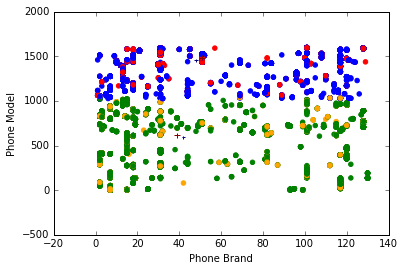

In [75]:
%matplotlib inline
plt.scatter(X.phone_brand, X.device_model, color=rainbow[four_cl])
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           km.cluster_centers_[:,2],
           km.cluster_centers_[:,3],
           marker='+')
plt.xlabel('Phone Brand')
plt.ylabel('Phone Model')

In [76]:
X['cluster'] = km.labels_

In [77]:
X.head()

,phone_brand,device_model,counts,installed,active,label_id,cluster
8460527,51,749,-1.0,-1.0,-1.0,-1.0,1
8460527,51,749,-1.0,-1.0,-1.0,-1.0,1
6455195,51,749,1.0,53.0,6.0,713.0,3
8460527,51,1524,-1.0,-1.0,-1.0,-1.0,2
8460527,51,753,-1.0,-1.0,-1.0,-1.0,1


In [79]:
X.sort('cluster')

C:\Users\richter Belmont\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,phone_brand,device_model,counts,installed,active,label_id,cluster
813239,51,1518,3.0,6.0,6.0,713.0,0
771441,128,1588,5.0,24.0,11.0,721.0,0
4218514,128,1588,1.0,33.0,12.0,548.0,0
2150513,128,1590,6.0,34.0,2.0,548.0,0
2013462,128,1587,3.0,18.0,12.0,713.0,0
11328,128,1587,173.0,12.0,12.0,549.0,0
39648,51,1518,103.0,30.0,4.0,549.0,0
1625489,31,1542,10.0,7.0,7.0,713.0,0
101963,96,1312,90.0,2.0,2.0,548.0,0
7389751,51,1520,1.0,29.0,12.0,548.0,0


In [92]:
# Create 15 different KMeans clusterers, each
# with values 1..15 n_clusters.
# Create a bunch of different models
import sklearn.metrics
cluster_centres = {}
cluster_membership = {}
for cluster_count in range (2,15):
    km = sklearn.cluster.KMeans(init='k-means++', n_clusters=cluster_count)
    cluster_membership[cluster_count] = km.fit_predict(X)
    cluster_centres[cluster_count] = km.cluster_centers_

In [93]:
four_cl_score = sklearn.metrics.silhouette_score(X, four_cl) # Why are you giving me error? :(

MemoryError: 

# What is causing this error?

In [105]:
s = {}
k_rng = range(2,10)
for cluster_count in k_rng:
    s[cluster_count] = sklearn.metrics.silhouette_score(X, cluster_membership[cluster_count])
    print cluster_count, s[cluster_count]

MemoryError: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000090311B00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000122D6C50>]], dtype=object)

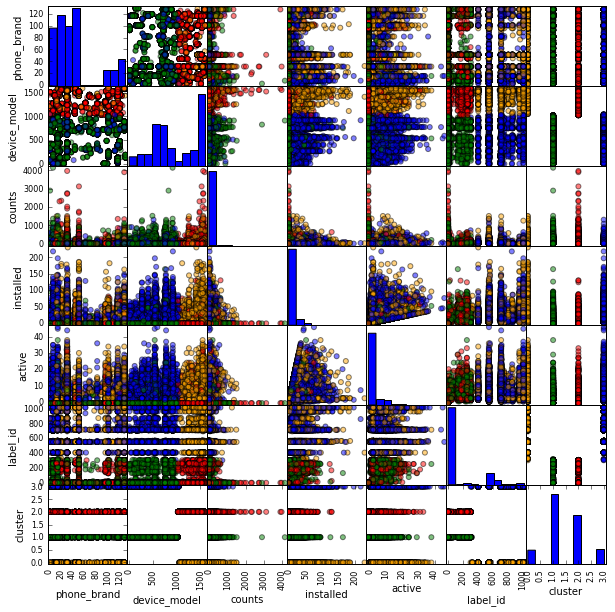

In [89]:
pd.scatter_matrix(X, c=rainbow[cluster_membership[4]], figsize=(10,10), s=100)

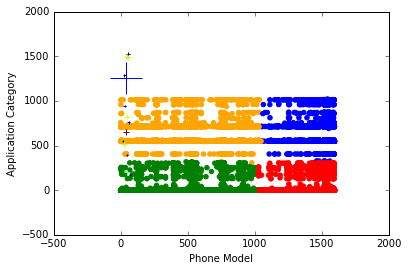

In [100]:
plt.scatter(X.device_model, X.label_id, color=rainbow[cluster_membership[4]])
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           km.cluster_centers_[:,2],
           km.cluster_centers_[:,3],
           marker='+')
plt.xlabel('Phone Model')
plt.ylabel('Application Category')

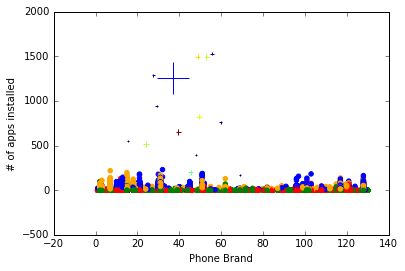

In [101]:
plt.scatter(X.phone_brand, X.installed, color=rainbow[cluster_membership[4]])
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           km.cluster_centers_[:,2],
           km.cluster_centers_[:,3],
           marker='+')
plt.xlabel('Phone Brand')
plt.ylabel('# of apps installed')

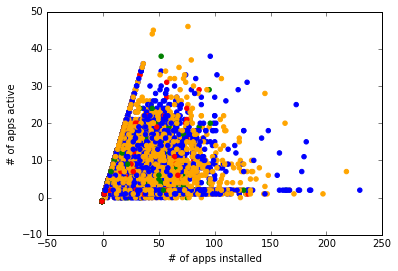

In [103]:
plt.scatter(X.installed, X.active, color=rainbow[cluster_membership[4]])
plt.xlabel('# of apps installed')
plt.ylabel('# of apps active')

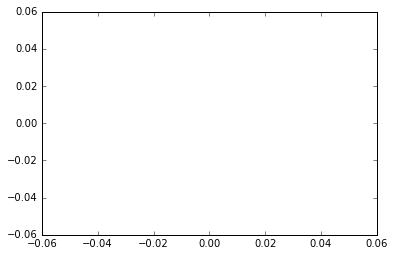

In [104]:
plt.scatter(s.keys(), s.values())

# DBScan

In [148]:
db = sklearn.cluster.DBSCAN(eps=100, min_samples=140)

In [149]:
db_cl = db.fit_predict(X)

In [150]:
# X_db_cl = X.copy() #one time thing

In [151]:
# X_db_cl = X_db_cl.drop('cluster', axis=1)

In [113]:
X_db_cl.head()

,phone_brand,device_model,counts,installed,active,label_id
8460527,51,749,-1.0,-1.0,-1.0,-1.0
8460527,51,749,-1.0,-1.0,-1.0,-1.0
6455195,51,749,1.0,53.0,6.0,713.0
8460527,51,1524,-1.0,-1.0,-1.0,-1.0
8460527,51,753,-1.0,-1.0,-1.0,-1.0


In [152]:
X_db_cl['db_cls'] = db.labels_

In [153]:
X_db_cl.sort('db_cls')

C:\Users\richter Belmont\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,phone_brand,device_model,counts,installed,active,label_id,db_cls
456481,15,527,4.0,24.0,7.0,1012.0,-1
16879,31,269,53.0,35.0,15.0,1012.0,-1
33569,31,1545,323.0,24.0,24.0,713.0,-1
2337988,31,303,3.0,22.0,12.0,405.0,-1
15981,7,917,469.0,25.0,25.0,549.0,-1
1532829,15,544,11.0,46.0,6.0,1012.0,-1
8463466,15,598,323.0,-1.0,-1.0,-1.0,-1
63209,15,7,16.0,1.0,1.0,179.0,-1
8463466,51,754,411.0,-1.0,-1.0,-1.0,-1
8463466,31,449,297.0,-1.0,-1.0,-1.0,-1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000071C24B38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000D4593B00>]], dtype=object)

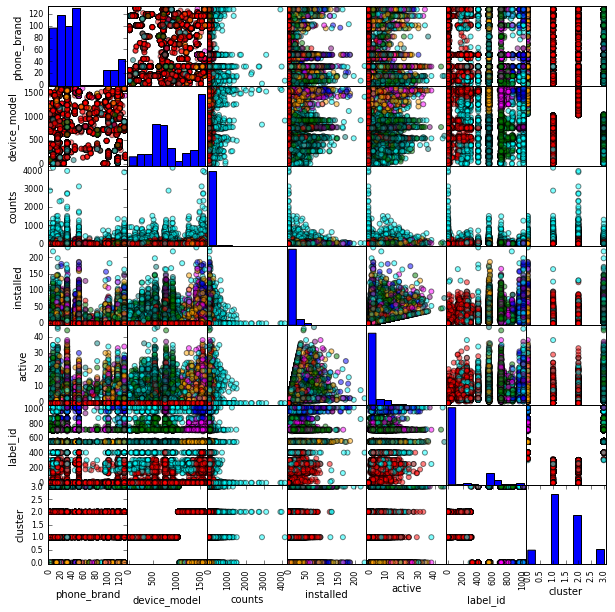

In [154]:
pd.scatter_matrix(X, c=rainbow[X_db_cl.db_cls], figsize=(10,10), s=100)

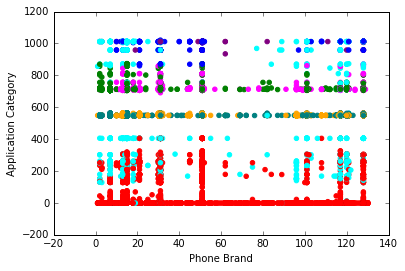

In [157]:
plt.scatter(X_db_cl.phone_brand, X_db_cl.label_id,
           color=rainbow[X_db_cl.db_cls])
plt.xlabel('Phone Brand')
plt.ylabel('Application Category')

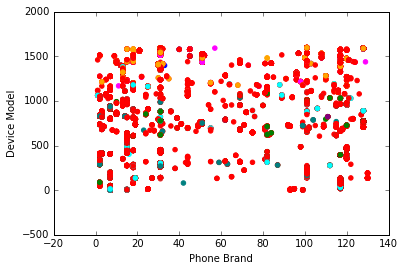

In [158]:
plt.scatter(X_db_cl.phone_brand, X_db_cl.device_model,
           color=rainbow[X_db_cl.db_cls])
plt.xlabel('Phone Brand')
plt.ylabel('Device Model')

# Clustering Conclusion

1) Dont think anything interesting come out of this...

2) Try adding timestamp (as feature) to see if we can get a good cluster out of it?

# Decision Tree

In [159]:
import sklearn.tree

In [161]:
X = X.drop('cluster', axis=1)

In [162]:
X.head()

,phone_brand,device_model,counts,installed,active,label_id
8460527,51,749,-1.0,-1.0,-1.0,-1.0
8460527,51,749,-1.0,-1.0,-1.0,-1.0
6455195,51,749,1.0,53.0,6.0,713.0
8460527,51,1524,-1.0,-1.0,-1.0,-1.0
8460527,51,753,-1.0,-1.0,-1.0,-1.0


In [163]:
dt = sklearn.tree.DecisionTreeClassifier(max_depth=7)

In [164]:
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [165]:
zip(dt.predict(X),y)

[(7, 10),
 (7, 10),
 (7, 10),
 (7, 9),
 (7, 9),
 (0, 1),
 (11, 10),
 (7, 10),
 (0, 10),
 (10, 4),
 (11, 9),
 (11, 4),
 (10, 2),
 (10, 10),
 (11, 11),
 (10, 2),
 (7, 10),
 (7, 10),
 (6, 11),
 (7, 10),
 (10, 4),
 (7, 7),
 (7, 7),
 (10, 8),
 (7, 9),
 (11, 10),
 (11, 10),
 (10, 4),
 (11, 10),
 (11, 10),
 (10, 10),
 (7, 10),
 (7, 6),
 (7, 9),
 (7, 10),
 (10, 10),
 (0, 7),
 (7, 10),
 (7, 10),
 (10, 9),
 (6, 8),
 (6, 6),
 (11, 9),
 (11, 9),
 (10, 8),
 (10, 8),
 (10, 8),
 (10, 8),
 (11, 2),
 (11, 9),
 (4, 4),
 (11, 9),
 (11, 9),
 (10, 4),
 (10, 4),
 (11, 10),
 (11, 10),
 (7, 10),
 (11, 11),
 (0, 9),
 (7, 7),
 (7, 7),
 (10, 10),
 (11, 8),
 (7, 11),
 (11, 8),
 (11, 10),
 (7, 2),
 (11, 10),
 (11, 8),
 (0, 11),
 (7, 11),
 (7, 11),
 (10, 8),
 (10, 6),
 (7, 8),
 (0, 5),
 (10, 5),
 (9, 7),
 (11, 11),
 (7, 10),
 (7, 10),
 (7, 10),
 (10, 9),
 (11, 5),
 (10, 8),
 (11, 11),
 (11, 11),
 (10, 7),
 (11, 11),
 (7, 10),
 (11, 11),
 (11, 11),
 (9, 7),
 (10, 5),
 (9, 9),
 (6, 0),
 (6, 0),
 (7, 9),
 (7, 9),
 (7,

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.767197 to fit



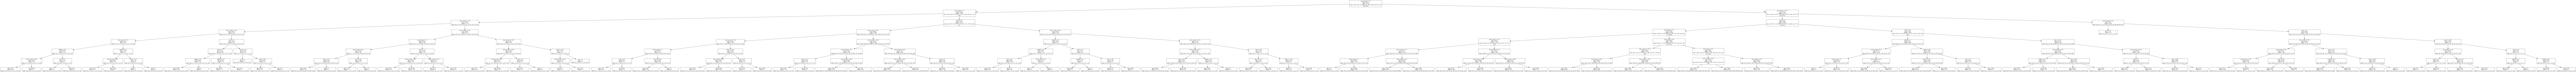

In [166]:
import StringIO
s = StringIO.StringIO()
sklearn.tree.export_graphviz(dt, out_file=s, feature_names=['phone_brand', 'device_model','counts', 'installed', 'active', 'label_id'])

import pydotplus
graph = pydotplus.graph_from_dot_data(s.getvalue())
import IPython.display
IPython.display.Image(graph.create_png())

# Grid Search

In [167]:
import sklearn.grid_search

In [168]:
dtr = sklearn.tree.DecisionTreeClassifier()

In [169]:
Params = {'max_depth': range(1,10),
         'criterion':['gini', 'entropy'],
         'max_features': range(1,4)}

In [170]:
brute_force = sklearn.grid_search.GridSearchCV(estimator=dtr, param_grid=Params, cv=6)

In [171]:
brute_force.fit(X, y)

GridSearchCV(cv=6, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [172]:
brute_force.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 3}

In [173]:
brute_force.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=3, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [183]:
import sklearn.cross_validation

In [184]:
split_stuff = sklearn.cross_validation.train_test_split(X, y)

In [185]:
(X_train, X_test, y_train, y_test) = split_stuff

In [186]:
classifier = sklearn.tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=3, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.432905 to fit



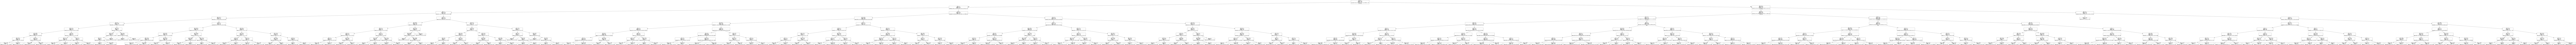

In [187]:
s = StringIO.StringIO()
sklearn.tree.export_graphviz(classifier, out_file=s)
graph = pydotplus.graph_from_dot_data(s.getvalue())
IPython.display.Image(graph.create_png())

In [188]:
y_predictions = classifier.predict(X_test)
sklearn.metrics.accuracy_score(y_test, y_predictions)

0.15003750937734434

# 15% Accuracy?

# What is wrong? What should I tweak? Less features, maybe?
# Just Phone brands, Device model, label id maybe?

# Random Forest

In [189]:
import sklearn.ensemble

In [190]:
rdf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, max_features=3)

In [191]:
rdf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [192]:
zip(rdf.feature_importances_, X.columns)

[(0.05410800171242941, 'phone_brand'),
 (0.27967670750735607, 'device_model'),
 (0.29272675177959523, 'counts'),
 (0.16243599831469857, 'installed'),
 (0.1110258805187533, 'active'),
 (0.10002666016716757, 'label_id')]

In [193]:
sklearn.cross_validation.cross_val_score(rdf, X, y, cv=15, scoring='accuracy').mean()

0.13493177718883506

# Oh dear, what is happening here? 

# Random Forest is doing worse than Decision Tree up there.

# 13% Accuracy!?

In [40]:
train = pd.read_csv('train.csv')

In [41]:
train.shape[0]

74645

In [42]:
train = train.drop('Unnamed: 0', axis=1)

In [43]:
train.head()

,device_id,group,phone_brand,device_model,counts,installed,active,label_id
0,-8076087639492063270,10,51,749,-1.0,-1.0,-1.0,-1.0
1,-2897161552818060146,10,51,749,-1.0,-1.0,-1.0,-1.0
2,-8260683887967679142,10,51,749,1.0,53.0,6.0,713.0
3,-4938849341048082022,9,51,1524,-1.0,-1.0,-1.0,-1.0
4,245133531816851882,9,51,753,-1.0,-1.0,-1.0,-1.0


In [58]:
events = pd.read_csv('events.csv')

In [53]:
events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [59]:
events = events.drop('event_id', axis=1)

In [60]:
events.drop_duplicates('device_id', keep='first', inplace=True)

In [61]:
events.tail()

,device_id,timestamp,longitude,latitude
3250786,-1081485245219287156,2016-05-06 22:17:52,0.0,0.0
3250918,-634925280832154541,2016-05-06 22:09:44,0.0,0.0
3251113,2390927717095168323,2016-05-07 22:49:00,0.0,0.0
3251668,-7754266053633390277,2016-05-02 23:34:42,0.0,0.0
3251685,-1184626127904161598,2016-05-03 23:33:02,0.0,0.0


In [62]:
train = pd.merge(train, events, how='left', on='device_id')

In [63]:
train.head()

,device_id,group,phone_brand,device_model,counts,installed,active,label_id,timestamp,longitude,latitude
0,-8076087639492063270,10,51,749,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN
1,-2897161552818060146,10,51,749,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN
2,-8260683887967679142,10,51,749,1.0,53.0,6.0,713.0,2016-05-01 14:23:37,0.0,0.0
3,-4938849341048082022,9,51,1524,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN
4,245133531816851882,9,51,753,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN


In [64]:
train.shape[0]

74645

In [65]:
train = train.drop(['timestamp'], axis=1)

In [66]:
train.head()

,device_id,group,phone_brand,device_model,counts,installed,active,label_id,longitude,latitude
0,-8076087639492063270,10,51,749,-1.0,-1.0,-1.0,-1.0,NaN,NaN
1,-2897161552818060146,10,51,749,-1.0,-1.0,-1.0,-1.0,NaN,NaN
2,-8260683887967679142,10,51,749,1.0,53.0,6.0,713.0,0.0,0.0
3,-4938849341048082022,9,51,1524,-1.0,-1.0,-1.0,-1.0,NaN,NaN
4,245133531816851882,9,51,753,-1.0,-1.0,-1.0,-1.0,NaN,NaN


In [67]:
train.shape[0]

74645

In [69]:
train.isnull().sum()

device_id           0
group               0
phone_brand         0
device_model        0
counts              0
installed           0
active              0
label_id            0
longitude       51336
latitude        51336
dtype: int64